In [1]:
from sklearn.ensemble import RandomForestClassifier
help(RandomForestClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: bool = True, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |      use_label_encoder : bool
 |          (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
 |          code, we recommend that you set this parameter to False.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      learning_rate : Optional[float]
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : Optional[int]
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 

In [2]:
# --- 第 1 部分 ---
# 載入函式庫與資料集
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

np.random.seed(123456)
data = pd.read_csv('../Data/creditcard.csv')
data.Time = (data.Time-data.Time.min())/data.Time.std()
data.Amount = (data.Amount-data.Amount.mean())/data.Amount.std()

# 把資料分為 70% 訓練資料集與 30% 測試資料集
x_train, x_test, y_train, y_test = train_test_split(
        data.drop('Class', axis=1).values, data.Class.values, test_size=0.3)

In [5]:
# --- 第 2 部分 ---
# 計算訓練資料集以及驗證資料集準確率
x, y = x_train, y_train
learner = RandomForestClassifier(criterion='gini',
                                 n_jobs=4)          # 決定平行程序的數目
 
param_range=[x for x in range(10,101,10)]

train_scores, test_scores = validation_curve(learner,    # 模型
                                             x,          # 資料集的特徵 
                                             y,          # 資料集的標籤
                                             param_name = 'n_estimators', # 欲調整的超參數;指定要訓練多少弱學習器
                                             param_range=param_range,     # 超參數的範圍 
                                             cv = 10,                     # 交叉驗證的折數
                                             scoring = "f1",              # 評價指標
                                             n_jobs = -1)                 # 使用的CPU核心數;-1用全部

In [6]:
# --- 第 3 部分 ---
# 對每個超參數計算模型準確率的平均數與標準差
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

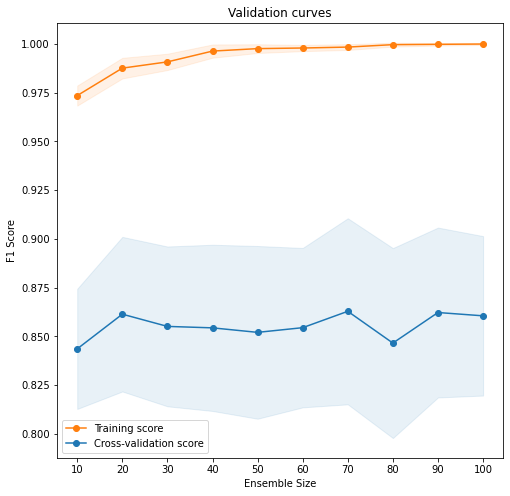

In [7]:
# --- 第 4 部分 ---
# 繪製折線圖
plt.figure(figsize = (8, 8))
plt.title('Validation curves')
# 繪製標準差
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha = 0.1,
                 color="C1")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha = 0.1, color = "C0")

# 繪製平均數
plt.plot(param_range, train_scores_mean, 'o-', color = "C1",
         label="Training score")
plt.plot(param_range, test_scores_mean, 'o-', color = "C0",
         label="Cross-validation score")

plt.xticks(param_range)
plt.xlabel('Ensemble Size')
plt.ylabel('F1 Score')
plt.legend(loc="best")

In [8]:
# --- 第 5 部分 ---
# 進行集成
# 原始訓練資料
ensemble = RandomForestClassifier(criterion='gini', # 目標函數:基尼不純度(Gini impurity)、熵(entropy)
                                  n_estimators=50,  # 指定基學習器的數量
                                  n_jobs=4)         # 決定平行程序的數目

ensemble.fit(x_train, y_train)
print('原始訓練資料:')
print('RF f1', metrics.f1_score(y_test, ensemble.predict(x_test)))
print('RF recall', metrics.recall_score(y_test, ensemble.predict(x_test)))

原始訓練資料:
RF f1 0.8514056224899599
RF recall 0.7794117647058824


In [9]:
# --- 第 6 部分 ---
# 過濾低相關性的資料
# 篩選特徵
np.random.seed(123456)
threshold = 0.1

correlations = data.corr()['Class'].drop('Class')
fs = list(correlations[(abs(correlations)>threshold)].index.values)
fs.append('Class')
data = data[fs]

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(data.drop('Class', axis=1).values, 
                                                    data.Class.values, 
                                                    test_size=0.3)

ensemble = RandomForestClassifierForestClassifierForestClassifieromForestClassifierdomForestClassifierndomForestClassifier(criterion='gini', # 目標函數:基尼不純度(Gini impurity)、熵(entropy)
                                  n_estimators=50,  # 指定基學習器的數量
                                  n_jobs=4)         # 決定平行程序的數目


ensemble.fit(x_train_f, y_train_f)
print('過濾低相關性的資料:')
print('RF f1', metrics.f1_score(y_test_f, ensemble.predict(x_test_f)))
print('RF recall', metrics.recall_score(y_test_f, ensemble.predict(x_test_f)))

過濾低相關性的資料:
RF f1 0.8605577689243027
RF recall 0.7941176470588235


In [10]:
# --- 第 7 部分 ---
# 修改目標函數:基尼不純度(Gini impurity)->熵(entropy)

# 原始訓練資料
ensemble = RandomForestClassifier(criterion='entropy', # 目標函數:基尼不純度(Gini impurity)、熵(entropy)
                                  n_estimators=50,  # 指定基學習器的數量
                                  n_jobs=4)         # 決定平行程序的數目


ensemble.fit(x_train, y_train)
print('原始訓練資料:')
print('RF f1', metrics.f1_score(y_test, ensemble.predict(x_test)))
print('RF recall', metrics.recall_score(y_test, ensemble.predict(x_test)))

# 過濾低相關性的資料
ensemble = RandomForestClassifier(criterion='entropy', # 目標函數:基尼不純度(Gini impurity)、熵(entropy)
                                  n_estimators=50,  # 指定基學習器的數量
                                  n_jobs=4)         # 決定平行程序的數目
ensemble.fit(x_train_f, y_train_f)
print('過濾低相關性的資料:')
print('RF f1', metrics.f1_score(y_test_f, ensemble.predict(x_test_f)))
print('RF recall', metrics.recall_score(y_test_f, ensemble.predict(x_test_f)))

原始訓練資料:
RF f1 0.874493927125506
RF recall 0.7941176470588235
過濾低相關性的資料:
RF f1 0.864
RF recall 0.7941176470588235


In [1]:
"2099131".zfill(8)

'02099131'